In [2]:
!nvidia-smi

Sat Aug  2 18:48:22 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.230.02             Driver Version: 535.230.02   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          On  | 00000000:31:00.0 Off |                    0 |
| N/A   37C    P0              49W / 400W |      0MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [3]:
import ast

def to_int_list(s):
    if pd.isna(s):
        return []
    s = ast.literal_eval(s)
    s = [int(x) for x in s]
    return s


In [19]:
# 1) define the canonical names
NAMES = [
    "empathetic_dialogue",
    "programming",
    "math",
    "mmlu",
]

# 2) build the file‐lists via f-strings
def make_name(name, path):
    if path == "explanations":
        return f"./datasets/dot_product/Judge/{name}_with_explanations.csv"
    elif path == "processed":
        return f"./datasets/{name}_processed.csv"
    else:
        print("ERROR")
        return "ERROR"

TYPES = ["res", "mlp", "att"]
LAYERS = [i for i in range(0, 26)]

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

number = 0
name1 = DATASET_EXP[number]
df1 = pd.read_csv(make_name(name1, "explanations"))   # cols: layer, type, neuron_id
# Optional: ensure consistent dtypes
df1["layer"] = df1["layer"].astype(int)
df1["Neuron_ID"]  = df1["Neuron_ID"].astype(int)
df1["type"]  = df1["type"].astype(str)

# this needs to be compared against the other CLASSES on NAMES 
set1 = set()
for idx, row in df1.iterrows():
    typ = row["type"]
    layer = row["layer"]
    neuron = row["Neuron_ID"]
    set1.add((typ, layer, neuron))


# Get the values for the set
for name2 in NAMES:
    if name2 == name1: continue
    df2 = pd.read_csv(make_name(name2, "processed")   # same structure

    for typ in TYPES:
        for layer in LAYERS:
            col = f"gemma-scope-2b-pt-{typ}-canonical-layer_{layer}/width_16k/canonical-token_feature_ids"
            # iterate over (index, cell_value) pairs
            # if col not in df2.columns:
            #     continue
            for idx, cell in df2[col].items():  
                parsed = to_int_list(cell)
                for num in parsed:
                    

/tmp/ipykernel_1016619/2807389387.py:10: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(path1)   # cols: layer, type, neuron_id


In [5]:
# Optional: ensure consistent dtypes
df1["layer"] = df1["layer"].astype(int)
df1["Neuron_ID"]  = df1["Neuron_ID"].astype(int)
df1["type"]  = df1["type"].astype(str)


# convert string to list[int] 
for typ in TYPES:
    for layer in LAYERS:
        col = f"gemma-scope-2b-pt-{typ}-canonical-layer_{layer}/width_16k/canonical-token_feature_ids"
        # iterate over (index, cell_value) pairs
        if col not in df2.columns:
            continue
        for idx, cell in df2[col].items():  
            parsed = to_int_list(cell)
            for num in parsed:
                set2.add((typ, layer, num))

In [10]:
# Jaccard 
# put in a set all the combinations of df1 and df2

set1 = set()
for idx, row in df1.iterrows():
    typ = row["type"]
    layer = row["layer"]
    neuron = row["Neuron_ID"]
    set1.add((typ, layer, neuron))

set2 = set()
for typ in TYPES:
    for layer in LAYERS:
        col = f"gemma-scope-2b-pt-{typ}-canonical-layer_{layer}/width_16k/canonical-token_feature_ids"
        # iterate over (index, cell_value) pairs
        # if col not in df2.columns:
            # continue
        for idx, cell in df2[col].items():  
            # parsed = to_int_list(cell)
            # df2.at[idx, col] = parsed
            for num in parsed:
                set2.add((typ, layer, num))

In [12]:
# def jaccard(A: set, B: set) -> float:
#     """Standard J(A,B) = |A∩B| / |A∪B|."""
#     if not A and not B:
#         return 0.0
#     return len(A & B) / len(A | B)

# def overlap_coef(A: set, B: set) -> float:
#     """Overlap(A,B) = |A∩B| / min(|A|,|B|)."""
#     m = min(len(A), len(B))
#     if m == 0:
#         return 0.0
#     return len(A & B) / m

# # Example on your full triple‐sets:
# inter = set1 & set2
# print("Jaccard:            ", jaccard(set1, set2))
# print("Overlap Coefficient:", overlap_coef(set1, set2))

Jaccard:             0.00209445887021704
Overlap Coefficient: 0.2579185520361991


In [14]:
if set1:
    frac_prog_in_math = len(set1 & set2) / len(set1)
else:
    frac_prog_in_math = 0.0

print(f"{frac_prog_in_math:.2%} of programming neurons appear in math neurons")

0.21% of programming neurons appear in math neurons


# Put all together

In [ ]:
# ==============================================================================================================================

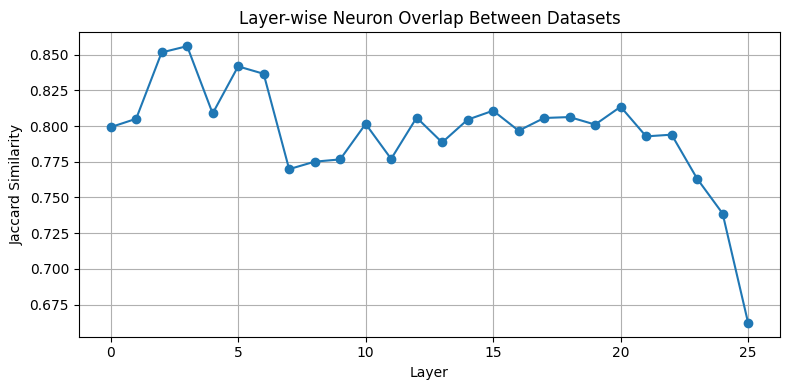

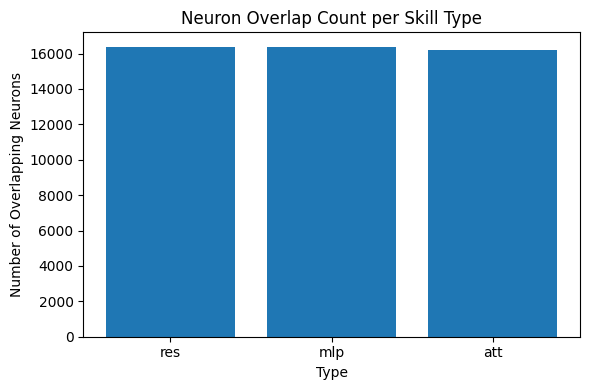

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) helper to build your file-paths
def make_path(name, mode):
    if mode == "explanations":
        return f"./datasets/dot_product/Judge/{name}_with_explanations.csv"
    elif mode == "processed":
        return f"./datasets/{name}_processed.csv"
    else:
        raise ValueError

# 2) the four skill names
NAMES = ["empathetic_dialogue","programming","math","mmlu"]
LAYERS = list(range(26))

# 3) load the “source” (X) once
src = NAMES[0]   # empathetic_dialogue
df_x = pd.read_csv(make_path(src, "explanations"))
df_x["layer"]     = df_x["layer"].astype(int)
df_x["Neuron_ID"] = df_x["Neuron_ID"].astype(int)
df_x["type"]      = df_x["type"].astype(str)

# build a lookup: for each layer ℓ, the set of (type,layer,neuron) in X
x_by_layer = {
    ℓ: set(df_x[df_x["layer"] == ℓ]
           .apply(lambda r: (r["type"], r["layer"], r["Neuron_ID"]), axis=1))
    for ℓ in LAYERS
}

# 4) for each target Y, compute per-layer containment
containment = {}
for tgt in NAMES[1:]:
    df_y = pd.read_csv(make_path(tgt, "processed"))
    df_y["layer"]     = df_y["layer"].astype(int)
    df_y["Neuron_ID"] = df_y["Neuron_ID"].astype(int)
    df_y["type"]      = df_y["type"].astype(str)

    # build the full set of triples in Y
    all_y = set(df_y.apply(lambda r: (r["type"], r["layer"], r["Neuron_ID"]), axis=1))

    # now per layer ℓ, what fraction of X’s ℓ-set is in all_y?
    sims = []
    for ℓ in LAYERS:
        s_x = x_by_layer[ℓ]
        if not s_x:
            sims.append(0.0)
        else:
            sims.append(len(s_x & all_y) / len(s_x))
    containment[tgt] = sims

# 5) plot
plt.figure(figsize=(8,5))
for tgt, sims in containment.items():
    plt.plot(LAYERS, sims, marker="o", label=tgt)
plt.xlabel("Layer")
plt.ylabel(f"Frac. of {src}-neurons in Y")
plt.title(f"Directed containment of {src} across layers")
plt.xticks(LAYERS)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_1016619/2579352337.py:19: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_x = pd.read_csv(make_path(src, "explanations"))


KeyError: 'layer'

Loading primary dataset: empathetic_dialogue


/tmp/ipykernel_1016619/1476143882.py:41: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Processing comparison: empathetic_dialogue vs programming
  - For programming, 95.16% of layer 25 'empathetic_dialogue' neurons appear in 'programming' neurons.
Processing comparison: empathetic_dialogue vs math
  - For math, 68.28% of layer 25 'empathetic_dialogue' neurons appear in 'math' neurons.
Processing comparison: empathetic_dialogue vs mmlu
  - For mmlu, 90.91% of layer 25 'empathetic_dialogue' neurons appear in 'mmlu' neurons.


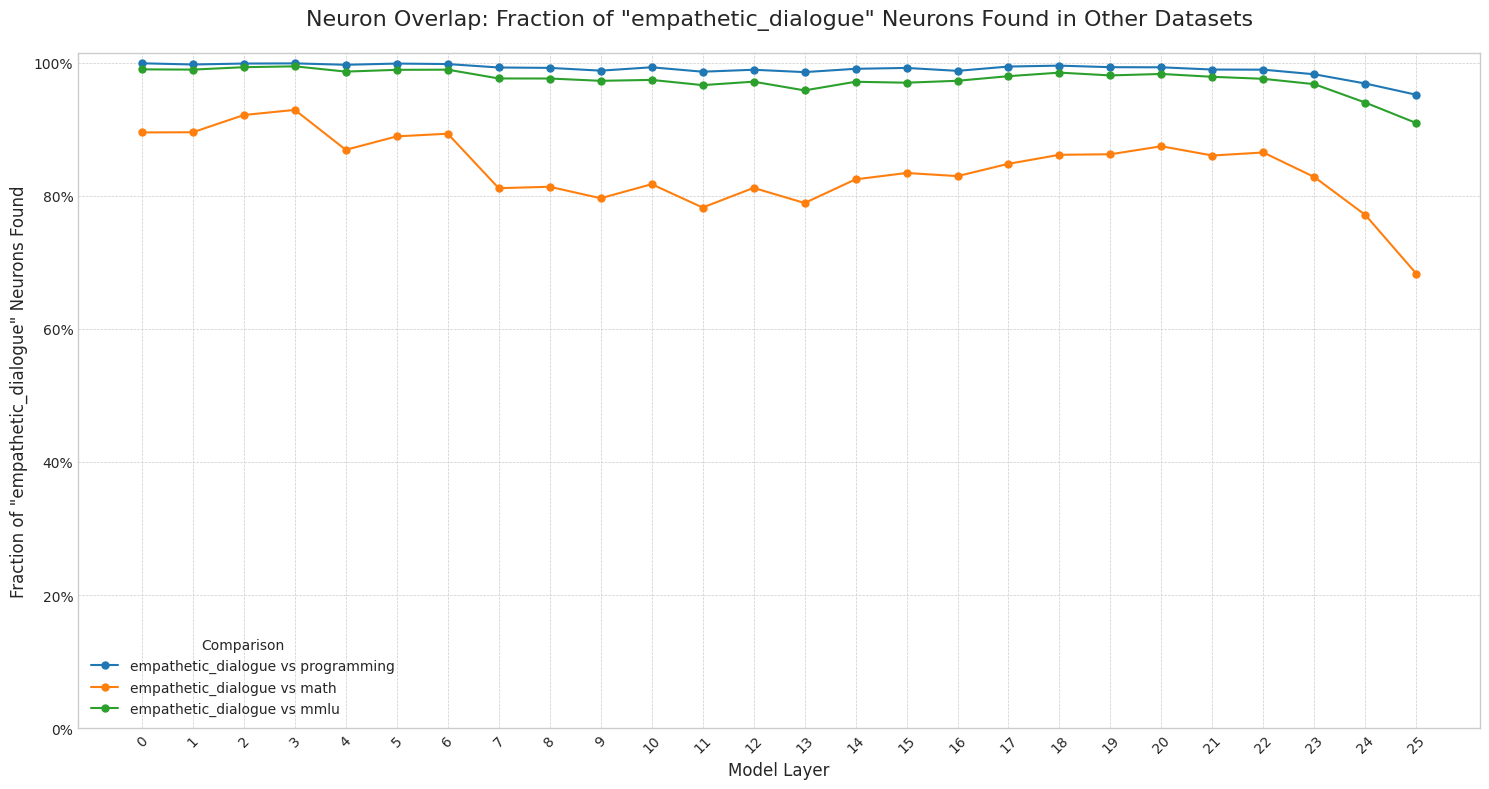

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

# --- Configuration ---

# 1) Define the primary and comparison datasets
PRIMARY_NAME = "empathetic_dialogue"
COMPARISON_NAMES = ["programming", "math", "mmlu"]

# 2) Define model architecture details
TYPES = ["res", "mlp", "att"]
LAYERS = list(range(26))

# --- Helper Functions ---

def make_name(name, path_type):
    """Generates the file path for a given dataset name and path type."""
    if path_type == "explanations":
        return f"./datasets/dot_product/Judge/{name}_with_explanations.csv"
    elif path_type == "processed":
        return f"./datasets/{name}_processed.csv"
    else:
        raise ValueError(f"Unknown path type: {path_type}")

def to_int_list(s):
    """Safely converts a string representation of a list into a list of integers."""
    if pd.isna(s):
        return []
    try:
        s_list = ast.literal_eval(s)
        return [int(x) for x in s_list]
    except (ValueError, SyntaxError):
        return []

# --- Data Loading Functions ---

def get_neurons_from_explanations(name):
    """Loads and organizes neurons from an '_with_explanations.csv' file by layer."""
    filepath = make_name(name, "explanations")
    df = pd.read_csv(filepath)
    df["layer"] = df["layer"].astype(int)
    df["Neuron_ID"]  = df["Neuron_ID"].astype(int)

    neurons_by_layer = {layer: set() for layer in LAYERS}
    for _, row in df.iterrows():
        neurons_by_layer[row['layer']].add(row['Neuron_ID'])
        
    return neurons_by_layer

def get_neurons_from_processed(name):
    """Loads and organizes neurons from a '_processed.csv' file by layer."""
    filepath = make_name(name, "processed")
    df = pd.read_csv(filepath)

    neurons_by_layer = {layer: set() for layer in LAYERS}
    for layer in LAYERS:
        for typ in TYPES:
            col = f"gemma-scope-2b-pt-{typ}-canonical-layer_{layer}/width_16k/canonical-token_feature_ids"
            
            if col not in df.columns:
                continue
            
            for cell in df[col].dropna():
                neuron_ids = to_int_list(cell)
                neurons_by_layer[layer].update(neuron_ids)
                
    return neurons_by_layer

# --- Main Execution and Plotting ---

print(f"Loading primary dataset: {PRIMARY_NAME}")
primary_neurons = get_neurons_from_explanations(PRIMARY_NAME)

# Set up the plot aesthetics
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(15, 8))

# Loop through each comparison dataset
for name2 in COMPARISON_NAMES:
    print(f"Processing comparison: {PRIMARY_NAME} vs {name2}")
    
    comparison_neurons = get_neurons_from_processed(name2)
    
    similarities = []
    # Calculate similarity for each layer
    for layer in LAYERS:
        set1 = primary_neurons.get(layer, set())
        set2 = comparison_neurons.get(layer, set())
        
        # Use the specified formula
        if len(set1) > 0:
            frac_in_other = len(set1.intersection(set2)) / len(set1)
        else:
            frac_in_other = 0.0
            
        similarities.append(frac_in_other)
        
    # Example print statement for the last layer
    if len(LAYERS) > 0 and len(similarities) > 0:
      print(f"  - For {name2}, {similarities[-1]:.2%} of layer {LAYERS[-1]} '{PRIMARY_NAME}' neurons appear in '{name2}' neurons.")

    # Plot the results for the current comparison
    ax.plot(LAYERS, similarities, marker='o', linestyle='-', markersize=5, label=f'{PRIMARY_NAME} vs {name2}')

# Finalize and display the plot
ax.set_title(f'Neuron Overlap: Fraction of "{PRIMARY_NAME}" Neurons Found in Other Datasets', fontsize=16, pad=20)
ax.set_xlabel('Model Layer', fontsize=12)
ax.set_ylabel(f'Fraction of "{PRIMARY_NAME}" Neurons Found', fontsize=12)
ax.set_xticks(LAYERS)
ax.tick_params(axis='x', rotation=45)
ax.set_ylim(0) 
ax.legend(title='Comparison', fontsize=10)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Format y-axis to show percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

plt.tight_layout()
plt.show()

/tmp/ipykernel_1016619/399131143.py:37: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(make_name(name1, "explanations"))


Processing programming...
Processing math...
Processing mmlu...


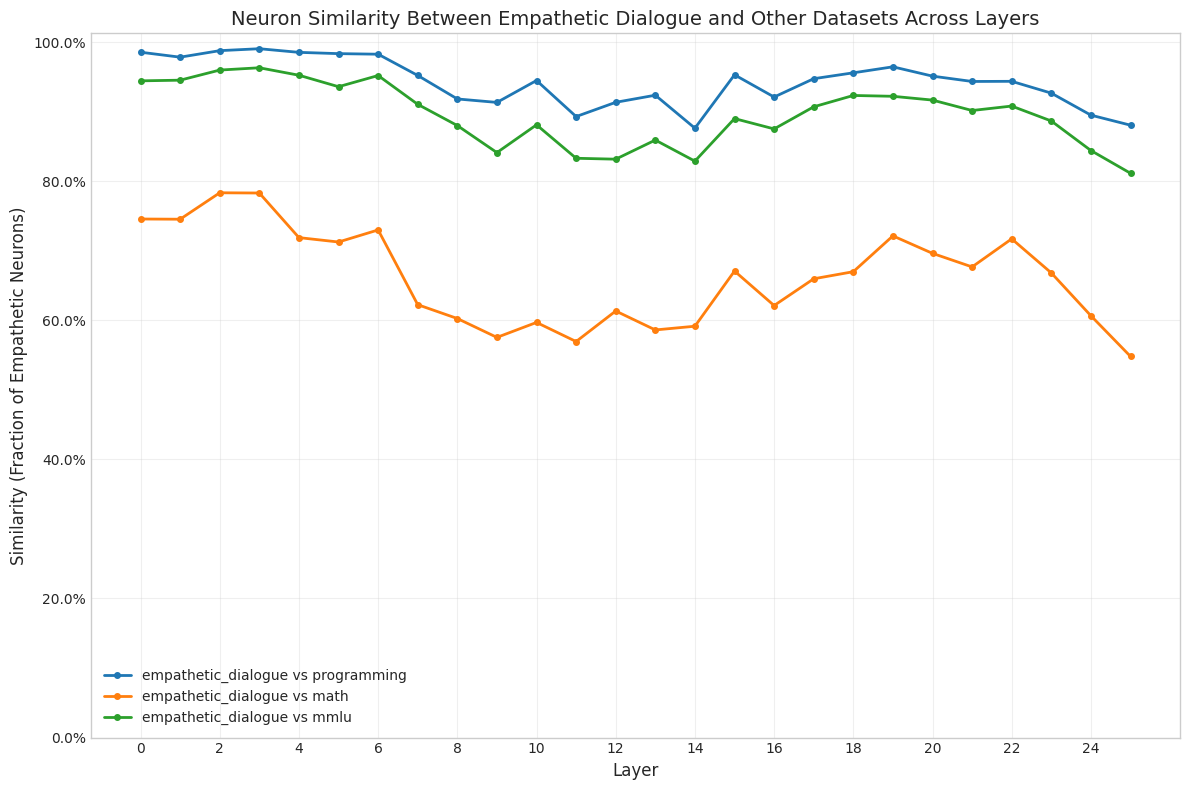


Summary Statistics:
--------------------------------------------------
programming:
  Average similarity: 94.27%
  Max similarity: 99.05%
  Min similarity: 87.63%
  Best layer: 3

math:
  Average similarity: 66.28%
  Max similarity: 78.34%
  Min similarity: 54.81%
  Best layer: 2

mmlu:
  Average similarity: 89.63%
  Max similarity: 96.31%
  Min similarity: 81.15%
  Best layer: 3



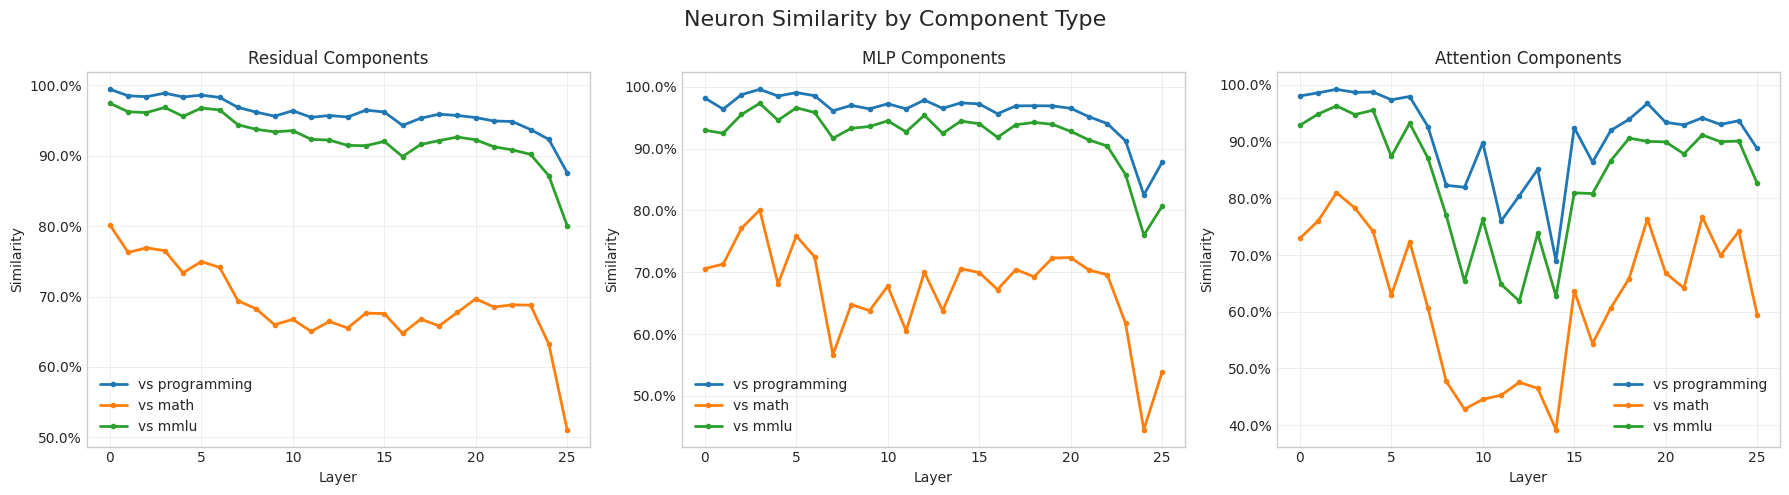

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from collections import defaultdict

def to_int_list(s):
    if pd.isna(s):
        return []
    s = ast.literal_eval(s)
    s = [int(x) for x in s]
    return s

# Define the canonical names
NAMES = [
    "empathetic_dialogue",
    "programming", 
    "math",
    "mmlu",
]

# Build the file-lists via f-strings
def make_name(name, path):
    if path == "explanations":
        return f"./datasets/dot_product/Judge/{name}_with_explanations.csv"
    elif path == "processed":
        return f"./datasets/{name}_processed.csv"
    else:
        print("ERROR")
        return "ERROR"

TYPES = ["res", "mlp", "att"]
LAYERS = [i for i in range(0, 26)]

# Load empathetic_dialogue as the reference dataset
number = 0
name1 = NAMES[number]  # "empathetic_dialogue"
df1 = pd.read_csv(make_name(name1, "explanations"))

# Ensure consistent dtypes
df1["layer"] = df1["layer"].astype(int)
df1["Neuron_ID"] = df1["Neuron_ID"].astype(int)
df1["type"] = df1["type"].astype(str)

# Build empathetic_dialogue neuron sets by layer and type
empathetic_neurons = defaultdict(lambda: defaultdict(set))
for idx, row in df1.iterrows():
    typ = row["type"]
    layer = row["layer"]
    neuron = row["Neuron_ID"]
    empathetic_neurons[layer][typ].add(neuron)

# Initialize results storage
similarity_results = {}

# Compare against each other dataset
for name2 in NAMES[1:]:  # Skip empathetic_dialogue
    print(f"Processing {name2}...")
    df2 = pd.read_csv(make_name(name2, "processed"))
    
    # Initialize similarity tracking for this comparison
    layer_similarities = defaultdict(lambda: defaultdict(list))
    
    for typ in TYPES:
        for layer in LAYERS:
            col = f"gemma-scope-2b-pt-{typ}-canonical-layer_{layer}/width_16k/canonical-token_feature_ids"
            
            if col not in df2.columns:
                continue
                
            # Collect all neurons for this layer/type combination
            current_neurons = set()
            for idx, cell in df2[col].items():
                parsed = to_int_list(cell)
                current_neurons.update(parsed)
            
            # Calculate similarity with empathetic_dialogue
            empathetic_set = empathetic_neurons[layer][typ]
            
            if empathetic_set:
                overlap = len(empathetic_set & current_neurons)
                similarity = overlap / len(empathetic_set)
            else:
                similarity = 0.0
            
            layer_similarities[layer][typ].append(similarity)
    
    # Average across types for each layer (or keep separate if you prefer)
    layer_avg_similarities = []
    for layer in LAYERS:
        layer_sims = []
        for typ in TYPES:
            if layer_similarities[layer][typ]:
                layer_sims.extend(layer_similarities[layer][typ])
        
        if layer_sims:
            avg_sim = sum(layer_sims) / len(layer_sims)
        else:
            avg_sim = 0.0
        layer_avg_similarities.append(avg_sim)
    
    similarity_results[name2] = {
        'layer_similarities': layer_avg_similarities,
        'by_type': dict(layer_similarities)
    }

# Create the line plot
plt.figure(figsize=(12, 8))

# Plot overall similarities
for dataset_name, results in similarity_results.items():
    plt.plot(LAYERS, results['layer_similarities'], 
             marker='o', linewidth=2, markersize=4,
             label=f"empathetic_dialogue vs {dataset_name}")

plt.xlabel('Layer', fontsize=12)
plt.ylabel('Similarity (Fraction of Empathetic Neurons)', fontsize=12)
plt.title('Neuron Similarity Between Empathetic Dialogue and Other Datasets Across Layers', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 26, 2))  # Show every other layer for clarity
plt.ylim(0, None)

# Format y-axis as percentage
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print("-" * 50)
for dataset_name, results in similarity_results.items():
    sims = results['layer_similarities']
    avg_similarity = sum(sims) / len(sims) if sims else 0
    max_similarity = max(sims) if sims else 0
    min_similarity = min(sims) if sims else 0
    
    print(f"{dataset_name}:")
    print(f"  Average similarity: {avg_similarity:.2%}")
    print(f"  Max similarity: {max_similarity:.2%}")
    print(f"  Min similarity: {min_similarity:.2%}")
    print(f"  Best layer: {sims.index(max_similarity) if sims else 'N/A'}")
    print()

# Optional: Create separate plots by type (res, mlp, att)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
type_names = ["Residual", "MLP", "Attention"]

for i, (typ, type_name) in enumerate(zip(TYPES, type_names)):
    ax = axes[i]
    
    for dataset_name, results in similarity_results.items():
        type_sims = []
        for layer in LAYERS:
            layer_data = results['by_type'][layer][typ]
            if layer_data:
                type_sims.append(sum(layer_data) / len(layer_data))
            else:
                type_sims.append(0.0)
        
        ax.plot(LAYERS, type_sims, marker='o', linewidth=2, markersize=3,
                label=f"vs {dataset_name}")
    
    ax.set_xlabel('Layer')
    ax.set_ylabel('Similarity')
    ax.set_title(f'{type_name} Components')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

plt.suptitle('Neuron Similarity by Component Type', fontsize=16)
plt.tight_layout()
plt.show()

In [1]:
empathetic_neurons

NameError: name 'empathetic_neurons' is not defined

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from collections import defaultdict

def to_int_list(s):
    if pd.isna(s):
        return []
    s = ast.literal_eval(s)
    s = [int(x) for x in s]
    return s

# Define the canonical names
NAMES = [
    "empathetic_dialogue",
    "programming", 
    "math",
    "mmlu",
]

# Build the file-lists via f-strings
def make_name(name, path):
    if path == "explanations":
        return f"./datasets/dot_product/Judge/{name}_with_explanations.csv"
    elif path == "processed":
        return f"./datasets/{name}_processed.csv"
    else:
        print("ERROR")
        return "ERROR"

TYPES = ["res", "mlp", "att"]
LAYERS = [i for i in range(0, 26)]

# Load empathetic_dialogue as the reference dataset (class1)
print("Loading empathetic_dialogue as reference...")
name1 = "empathetic_dialogue"
df1 = pd.read_csv(make_name(name1, "explanations"))

# Ensure consistent dtypes
df1["layer"] = df1["layer"].astype(int)
df1["Neuron_ID"] = df1["Neuron_ID"].astype(int)
df1["type"] = df1["type"].astype(str)

# Build empathetic_dialogue neuron sets by (layer, type)
empathetic_neurons = defaultdict(lambda: defaultdict(set))
for idx, row in df1.iterrows():
    typ = row["type"]
    layer = row["layer"]
    neuron = row["Neuron_ID"]
    empathetic_neurons[layer][typ].add(neuron)

# Initialize results storage for similarity by type
similarity_by_type = {typ: defaultdict(list) for typ in TYPES}

# Compare against each other dataset
for name2 in ["programming", "math", "mmlu"]:
    print(f"Processing {name2}...")
    df2 = pd.read_csv(make_name(name2, "processed"))
    
    # For each layer and type combination
    for layer in LAYERS:
        for typ in TYPES:
            col = f"gemma-scope-2b-pt-{typ}-canonical-layer_{layer}/width_16k/canonical-token_feature_ids"
            
            # Get empathetic neurons for this (layer, type)
            set1 = empathetic_neurons[layer][typ]
            
            # Get comparison dataset neurons for this (layer, type)
            set2 = set()
            if col in df2.columns:
                for idx, cell in df2[col].items():
                    parsed = to_int_list(cell)
                    set2.update(parsed)
            
            # Calculate similarity: len(set1 & set2) / len(set1)
            if set1:  # if set1 is not empty
                similarity = len(set1 & set2) / len(set1)
            else:
                similarity = 0.0
            # print(similarity)
            # Store results
            similarity_by_type[typ][name2].append(similarity)
            
            # Debug print for first few
            if layer < 3:
                print(f"Layer {layer}, Type {typ}, vs {name2}: "
                      f"{len(set1)} empathetic neurons, {len(set2)} {name2} neurons, "
                      f"overlap: {len(set1 & set2)}, similarity: {similarity:.2%}")

# Create the three line plots (one for each type)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
type_names = {"res": "Residual", "mlp": "MLP", "att": "Attention"}
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Blue, Orange, Green

for i, typ in enumerate(TYPES):
    ax = axes[i]
    
    for j, dataset_name in enumerate(["programming", "math", "mmlu"]):
        similarities = similarity_by_type[typ][dataset_name]
        
        ax.plot(LAYERS, similarities, 
                marker='o', linewidth=2, markersize=4, 
                color=colors[j], label=f"vs {dataset_name}")
    
    ax.set_xlabel('Layer', fontsize=12)
    ax.set_ylabel('Similarity', fontsize=12)
    ax.set_title(f'{type_names[typ]} Components', fontsize=13)
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_xticks(range(0, 26, 2))  # Show every other layer
    ax.set_ylim(0, None)
    
    # Format y-axis as percentage
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

plt.suptitle('Empathetic Dialogue Neuron Similarity Across Layers by Component Type', fontsize=16)
plt.tight_layout()
plt.show()

# Print detailed statistics
print("\n" + "="*80)
print("DETAILED SIMILARITY STATISTICS")
print("="*80)

for typ in TYPES:
    print(f"\n{type_names[typ].upper()} COMPONENTS:")
    print("-" * 40)
    
    for dataset_name in ["programming", "math", "mmlu"]:
        similarities = similarity_by_type[typ][dataset_name]
        
        if similarities:
            avg_sim = sum(similarities) / len(similarities)
            max_sim = max(similarities)
            min_sim = min(similarities)
            max_layer = similarities.index(max_sim)
            
            print(f"{dataset_name}:")
            print(f"  Average similarity: {avg_sim:.2%}")
            print(f"  Max similarity: {max_sim:.2%} (Layer {max_layer})")
            print(f"  Min similarity: {min_sim:.2%}")
            
            # Find layers with >10% similarity
            high_sim_layers = [i for i, sim in enumerate(similarities) if sim > 0.1]
            if high_sim_layers:
                print(f"  Layers with >10% similarity: {high_sim_layers}")
            print()

# Optional: Print the actual similarity values for inspection
print("\n" + "="*80)
print("LAYER-BY-LAYER SIMILARITY VALUES")
print("="*80)

for typ in TYPES:
    print(f"\n{type_names[typ].upper()}:")
    print("Layer", end="")
    for dataset in ["programming", "math", "mmlu"]:
        print(f"\t{dataset[:4]}", end="")
    print()
    
    for layer in range(min(10, len(LAYERS))):  # Show first 10 layers
        print(f"{layer:2d}", end="")
        for dataset in ["programming", "math", "mmlu"]:
            sim = similarity_by_type[typ][dataset][layer]
            print(f"\t{sim:.1%}", end="")
        print()
    if len(LAYERS) > 10:
        print("   ... (showing first 10 layers)")
    print()

Loading empathetic_dialogue as reference...


/tmp/ipykernel_2760797/3124590851.py:37: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(make_name(name1, "explanations"))


Processing programming...
Layer 0, Type res, vs programming: 6122 empathetic neurons, 12989 programming neurons, overlap: 6088, similarity: 99.44%
Layer 0, Type mlp, vs programming: 3952 empathetic neurons, 9625 programming neurons, overlap: 3880, similarity: 98.18%
Layer 0, Type att, vs programming: 2692 empathetic neurons, 8620 programming neurons, overlap: 2639, similarity: 98.03%
Layer 1, Type res, vs programming: 4912 empathetic neurons, 11227 programming neurons, overlap: 4840, similarity: 98.53%
Layer 1, Type mlp, vs programming: 4688 empathetic neurons, 12565 programming neurons, overlap: 4519, similarity: 96.40%
Layer 1, Type att, vs programming: 3607 empathetic neurons, 10373 programming neurons, overlap: 3556, similarity: 98.59%
Layer 2, Type res, vs programming: 5239 empathetic neurons, 11553 programming neurons, overlap: 5155, similarity: 98.40%
Layer 2, Type mlp, vs programming: 5836 empathetic neurons, 13560 programming neurons, overlap: 5762, similarity: 98.73%
Layer 2,

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x76deb2581250>>
Traceback (most recent call last):
  File "/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x76deb2581250>>
Traceback (most recent call last):
  File "/cephfs/volumes/hpc_data_prj/inf_narrative_msc/e8efa787-4d41-448d-a7aa-814b8f0fac1e/k24086575/jvenv/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0

Processing math...
Layer 0, Type res, vs math: 6122 empathetic neurons, 8660 math neurons, overlap: 4909, similarity: 80.19%
Layer 0, Type mlp, vs math: 3952 empathetic neurons, 5665 math neurons, overlap: 2790, similarity: 70.60%
Layer 0, Type att, vs math: 2692 empathetic neurons, 4776 math neurons, overlap: 1963, similarity: 72.92%
Layer 1, Type res, vs math: 4912 empathetic neurons, 7099 math neurons, overlap: 3746, similarity: 76.26%
Layer 1, Type mlp, vs math: 4688 empathetic neurons, 6753 math neurons, overlap: 3344, similarity: 71.33%
Layer 1, Type att, vs math: 3607 empathetic neurons, 6380 math neurons, overlap: 2742, similarity: 76.02%
Layer 2, Type res, vs math: 5239 empathetic neurons, 7446 math neurons, overlap: 4030, similarity: 76.92%
Layer 2, Type mlp, vs math: 5836 empathetic neurons, 8369 math neurons, overlap: 4500, similarity: 77.11%
Layer 2, Type att, vs math: 4733 empathetic neurons, 7215 math neurons, overlap: 3833, similarity: 80.98%
Processing mmlu...


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from collections import defaultdict

def to_int_list(s):
    if pd.isna(s):
        return []
    s = ast.literal_eval(s)
    s = [int(x) for x in s]
    return s

# Define the canonical names
NAMES = [
    "empathetic_dialogue",
    "programming", 
    "math",
    "mmlu",
]

# Build the file-lists via f-strings
def make_name(name, path):
    if path == "explanations":
        return f"./datasets/dot_product/Judge/{name}_with_explanations.csv"
    elif path == "processed":
        return f"./datasets/{name}_processed.csv"
    else:
        print("ERROR")
        return "ERROR"

TYPES = ["res", "mlp", "att"]
LAYERS = [i for i in range(0, 26)]

# Load empathetic_dialogue as the reference dataset (class1)
print("Loading empathetic_dialogue as reference...")
name1 = "empathetic_dialogue"
df1 = pd.read_csv(make_name(name1, "explanations"))

# Ensure consistent dtypes
df1["layer"] = df1["layer"].astype(int)
df1["Neuron_ID"] = df1["Neuron_ID"].astype(int)
df1["type"] = df1["type"].astype(str)

# Build empathetic_dialogue neuron sets by (layer, type)
empathetic_neurons = defaultdict(lambda: defaultdict(set))
for idx, row in df1.iterrows():
    typ = row["type"]
    layer = row["layer"]
    neuron = row["Neuron_ID"]
    empathetic_neurons[layer][typ].add(neuron)

# Initialize results storage for similarity by type
similarity_by_type = {typ: defaultdict(list) for typ in TYPES}

# Compare against each other dataset
for name2 in ["programming", "math", "mmlu"]:
    print(f"Processing {name2}...")
    df2 = pd.read_csv(make_name(name2, "processed"))
    
    # For each layer and type combination
    for layer in LAYERS:
        for typ in TYPES:
            col = f"gemma-scope-2b-pt-{typ}-canonical-layer_{layer}/width_16k/canonical-token_feature_ids"
            
            # Get empathetic neurons for this (layer, type)
            set1 = empathetic_neurons[layer][typ]
            
            # Get comparison dataset neurons for this (layer, type)
            set2 = set()
            if col in df2.columns:
                for idx, cell in df2[col].items():
                    parsed = to_int_list(cell)
                    set2.update(parsed)
            
            # Calculate Jaccard similarity: len(set1 & set2) / len(set1 | set2)
            union_size = len(set1 | set2)
            if union_size > 0:  # if union is not empty
                similarity = len(set1 & set2) / union_size
            else:
                similarity = 0.0
            
            # Store results
            similarity_by_type[typ][name2].append(similarity)
            
            # Debug print for first few
            if layer < 3:
                print(f"Layer {layer}, Type {typ}, vs {name2}: "
                      f"{len(set1)} empathetic neurons, {len(set2)} {name2} neurons, "
                      f"overlap: {len(set1 & set2)}, union: {len(set1 | set2)}, "
                      f"Jaccard: {similarity:.2%}")

# Create the three line plots (one for each type)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
type_names = {"res": "Residual", "mlp": "MLP", "att": "Attention"}
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Blue, Orange, Green

for i, typ in enumerate(TYPES):
    ax = axes[i]
    
    for j, dataset_name in enumerate(["programming", "math", "mmlu"]):
        similarities = similarity_by_type[typ][dataset_name]
        
        ax.plot(LAYERS, similarities, 
                marker='o', linewidth=2, markersize=4, 
                color=colors[j], label=f"vs {dataset_name}")
    
    ax.set_xlabel('Layer', fontsize=12)
    ax.set_ylabel('Jaccard Similarity', fontsize=12)
    ax.set_title(f'{type_names[typ]} Components', fontsize=13)
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_xticks(range(0, 26, 2))  # Show every other layer
    ax.set_ylim(0, None)
    
    # Format y-axis as percentage
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

plt.suptitle('Empathetic Dialogue Neuron Jaccard Similarity Across Layers by Component Type', fontsize=16)
plt.tight_layout()
plt.show()

# Print detailed statistics
print("\n" + "="*80)
print("DETAILED JACCARD SIMILARITY STATISTICS")
print("="*80)

for typ in TYPES:
    print(f"\n{type_names[typ].upper()} COMPONENTS:")
    print("-" * 40)
    
    for dataset_name in ["programming", "math", "mmlu"]:
        similarities = similarity_by_type[typ][dataset_name]
        
        if similarities:
            avg_sim = sum(similarities) / len(similarities)
            max_sim = max(similarities)
            min_sim = min(similarities)
            max_layer = similarities.index(max_sim)
            
            print(f"{dataset_name}:")
            print(f"  Average Jaccard: {avg_sim:.2%}")
            print(f"  Max Jaccard: {max_sim:.2%} (Layer {max_layer})")
            print(f"  Min Jaccard: {min_sim:.2%}")
            
            # Find layers with >5% Jaccard similarity  
            high_sim_layers = [i for i, sim in enumerate(similarities) if sim > 0.05]
            if high_sim_layers:
                print(f"  Layers with >5% Jaccard: {high_sim_layers}")
            print()

# Optional: Print the actual similarity values for inspection
print("\n" + "="*80)
print("LAYER-BY-LAYER JACCARD SIMILARITY VALUES")
print("="*80)

for typ in TYPES:
    print(f"\n{type_names[typ].upper()}:")
    print("Layer", end="")
    for dataset in ["programming", "math", "mmlu"]:
        print(f"\t{dataset[:4]}", end="")
    print()
    
    for layer in range(min(10, len(LAYERS))):  # Show first 10 layers
        print(f"{layer:2d}", end="")
        for dataset in ["programming", "math", "mmlu"]:
            sim = similarity_by_type[typ][dataset][layer]
            print(f"\t{sim:.1%}", end="")
        print()
    if len(LAYERS) > 10:
        print("   ... (showing first 10 layers)")
    print()

Loading empathetic_dialogue as reference...


/tmp/ipykernel_2803759/3596204088.py:37: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(make_name(name1, "explanations"))


Processing programming...
Layer 0, Type res, vs programming: 6122 empathetic neurons, 12989 programming neurons, overlap: 6088, union: 13023, Jaccard: 46.75%
Layer 0, Type mlp, vs programming: 3952 empathetic neurons, 9625 programming neurons, overlap: 3880, union: 9697, Jaccard: 40.01%
Layer 0, Type att, vs programming: 2692 empathetic neurons, 8620 programming neurons, overlap: 2639, union: 8673, Jaccard: 30.43%
Layer 1, Type res, vs programming: 4912 empathetic neurons, 11227 programming neurons, overlap: 4840, union: 11299, Jaccard: 42.84%
Layer 1, Type mlp, vs programming: 4688 empathetic neurons, 12565 programming neurons, overlap: 4519, union: 12734, Jaccard: 35.49%
Layer 1, Type att, vs programming: 3607 empathetic neurons, 10373 programming neurons, overlap: 3556, union: 10424, Jaccard: 34.11%
Layer 2, Type res, vs programming: 5239 empathetic neurons, 11553 programming neurons, overlap: 5155, union: 11637, Jaccard: 44.30%
Layer 2, Type mlp, vs programming: 5836 empathetic neu

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import os
from collections import defaultdict

# Create figures directory if it doesn't exist
os.makedirs("./figures/pairwise_analysis", exist_ok=True)

def to_int_list(s):
    if pd.isna(s):
        return []
    s = ast.literal_eval(s)
    s = [int(x) for x in s]
    return s

# Define the canonical names
NAMES = [
    "empathetic_dialogue",
    "programming", 
    "math",
    "mmlu",
]

NAMES_SPECIFIC = [
    "law_and_policy",
    "negative_feelings",
    "positive_feelings",
    "philosophy_and_ethics"
]

# Build the file-lists via f-strings
def make_name(name, path):
    if path == "explanations":
        return f"./datasets/dot_product/Judge/{name}_with_explanations.csv"
    elif path == "processed":
        return f"./datasets/{name}_processed.csv"
    else:
        print("ERROR")
        return "ERROR"

TYPES = ["res", "mlp", "att"]
LAYERS = [i for i in range(0, 26)]

def load_explanations_neurons(dataset_name):
    """Load neurons from explanations file and organize by (layer, type)"""
    print(f"Loading {dataset_name} from explanations...")
    df = pd.read_csv(make_name(dataset_name, "explanations"))
    
    # Ensure consistent dtypes
    df["layer"] = df["layer"].astype(int)
    df["Neuron_ID"] = df["Neuron_ID"].astype(int)
    df["type"] = df["type"].astype(str)
    
    # Build neuron sets by (layer, type)
    neurons = defaultdict(lambda: defaultdict(set))
    for idx, row in df.iterrows():
        typ = row["type"]
        layer = row["layer"]
        neuron = row["Neuron_ID"]
        neurons[layer][typ].add(neuron)
    
    return neurons

def load_processed_neurons(dataset_name):
    """Load neurons from processed file and organize by (layer, type)"""
    print(f"Loading {dataset_name} from processed...")
    df = pd.read_csv(make_name(dataset_name, "processed"))
    
    # Build neuron sets by (layer, type)
    neurons = defaultdict(lambda: defaultdict(set))
    
    for layer in LAYERS:
        for typ in TYPES:
            col = f"gemma-scope-2b-pt-{typ}-canonical-layer_{layer}/width_16k/canonical-token_feature_ids"
            
            if col in df.columns:
                for idx, cell in df[col].items():
                    parsed = to_int_list(cell)
                    neurons[layer][typ].update(parsed)
    
    return neurons

def calculate_jaccard_similarities(reference_neurons, comparison_datasets):
    """Calculate Jaccard similarities between reference and comparison datasets"""
    similarity_by_type = {typ: defaultdict(list) for typ in TYPES}
    
    for comp_name, comp_neurons in comparison_datasets.items():
        print(f"  Calculating similarities with {comp_name}...")
        
        for layer in LAYERS:
            for typ in TYPES:
                set1 = reference_neurons[layer][typ]  # reference set
                set2 = comp_neurons[layer][typ]       # comparison set
                
                # Calculate Jaccard similarity: len(set1 & set2) / len(set1 | set2)
                union_size = len(set1 | set2)
                if union_size > 0:
                    similarity = len(set1 & set2) / union_size
                else:
                    similarity = 0.0
                
                similarity_by_type[typ][comp_name].append(similarity)
    
    return similarity_by_type

def calculate_cosine_similarities(reference_neurons, comparison_datasets):
    """Calculate cosine similarities using frequency vectors"""
    from sklearn.metrics.pairwise import cosine_similarity
    import numpy as np
    
    similarity_by_type = {typ: defaultdict(list) for typ in TYPES}
    
    for comp_name, comp_neurons in comparison_datasets.items():
        for layer in LAYERS:
            for typ in TYPES:
                # Get frequency dictionaries instead of sets
                ref_freq = reference_neurons[layer][typ]  # {neuron_id: count}
                comp_freq = comp_neurons[layer][typ]     # {neuron_id: count}
                
                # Create unified neuron vocabulary
                all_neurons = set(ref_freq.keys()) | set(comp_freq.keys())
                
                # Build frequency vectors
                ref_vector = np.array([ref_freq.get(n, 0) for n in all_neurons])
                comp_vector = np.array([comp_freq.get(n, 0) for n in all_neurons])
                
                # Calculate cosine similarity
                if np.linalg.norm(ref_vector) > 0 and np.linalg.norm(comp_vector) > 0:
                    similarity = cosine_similarity([ref_vector], [comp_vector])[0][0]
                else:
                    similarity = 0.0
                
                similarity_by_type[typ][comp_name].append(similarity)
    
    return similarity_by_type

def plot_similarities(similarity_by_type, reference_name, comparison_names):
    """Create plots for the similarity results"""
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    type_names = {"res": "Residual", "mlp": "MLP", "att": "Attention"}
    colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]  # Blue, Orange, Green, Red
    
    for i, typ in enumerate(TYPES):
        ax = axes[i]
        
        for j, comp_name in enumerate(comparison_names):
            similarities = similarity_by_type[typ][comp_name]
            
            ax.plot(LAYERS, similarities, 
                    marker='o', linewidth=2, markersize=4, 
                    color=colors[j % len(colors)], 
                    label=f"vs {comp_name}")
        
        ax.set_xlabel('Layer', fontsize=12)
        ax.set_ylabel('Jaccard Similarity', fontsize=12)
        ax.set_title(f'{type_names[typ]} Components', fontsize=13)
        ax.legend()
        ax.grid(True, alpha=0.3)
        ax.set_xticks(range(0, 26, 2))
        ax.set_ylim(0, None)
        
        # Format y-axis as percentage
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
    
    plt.suptitle(f'{reference_name.title()} Neuron Jaccard Similarity Across Layers by Component Type', fontsize=16)
    plt.tight_layout()
    
    # Save the figure
    filename = f"jaccard_similarity_{reference_name}_vs_others.png"
    filepath = os.path.join("./figures/pairwise_analysis", filename)
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    print(f"Saved plot: {filepath}")
    
    plt.show()

def print_statistics(similarity_by_type, reference_name, comparison_names):
    """Print detailed statistics"""
    print(f"\n{'='*80}")
    print(f"DETAILED JACCARD SIMILARITY STATISTICS - {reference_name.upper()}")
    print(f"{'='*80}")
    
    type_names = {"res": "Residual", "mlp": "MLP", "att": "Attention"}
    
    for typ in TYPES:
        print(f"\n{type_names[typ].upper()} COMPONENTS:")
        print("-" * 40)
        
        for comp_name in comparison_names:
            similarities = similarity_by_type[typ][comp_name]
            
            if similarities:
                avg_sim = sum(similarities) / len(similarities)
                max_sim = max(similarities)
                min_sim = min(similarities)
                max_layer = similarities.index(max_sim)
                
                print(f"{comp_name}:")
                print(f"  Average Jaccard: {avg_sim:.2%}")
                print(f"  Max Jaccard: {max_sim:.2%} (Layer {max_layer})")
                print(f"  Min Jaccard: {min_sim:.2%}")
                
                # Find layers with >5% Jaccard similarity  
                high_sim_layers = [i for i, sim in enumerate(similarities) if sim > 0.05]
                if high_sim_layers:
                    print(f"  Layers with >5% Jaccard: {high_sim_layers}")
                print()

# Main execution: Process all combinations
all_results = {}

for reference_name in NAMES:
    print(f"\n{'='*60}")
    print(f"PROCESSING {reference_name.upper()} AS REFERENCE")
    print(f"{'='*60}")
    
    # Load reference dataset (explanations)
    reference_neurons = load_explanations_neurons(reference_name)
    
    # Get comparison dataset names (all others)
    comparison_names = [name for name in NAMES if name != reference_name]
    
    # Load all comparison datasets (processed)
    comparison_datasets = {}
    for comp_name in comparison_names:
        comparison_datasets[comp_name] = load_processed_neurons(comp_name)
    
    # Calculate similarities
    similarity_by_type = calculate_jaccard_similarities(reference_neurons, comparison_datasets)
    
    # Store results
    all_results[reference_name] = similarity_by_type
    
    # Create plots
    plot_similarities(similarity_by_type, reference_name, comparison_names)
    
    # Print statistics
    print_statistics(similarity_by_type, reference_name, comparison_names)

print(f"\n{'='*80}")
print("ALL ANALYSES COMPLETE!")
print(f"{'='*80}")
print("Generated 4 sets of plots:")
for name in NAMES:
    others = [n for n in NAMES if n != name]
    print(f"- {name} vs {others}")